# Conventional pole-based APWP

In [13]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from pmagpy import ipmag, pmag
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

from vgptools.auxiliar import (get_files_in_directory, spherical2cartesian, 
                               cartesian2spherical, GCD_cartesian)                              
from vgptools.utils_compilation import dfs_vgps_recomputed_poles
from vgptools.utils_APWPs import running_mean_APWP, RM_stats
from vgptools.utils_visualization import  RM_stats, plot_poles_and_APWP, RM_APWP_lat_lon_A95

Path to the VGP directory.

In [2]:
current_path = os.getcwd()
data_path_VGP = current_path + '/vgp_database'

## Generate a DataFrame for both, the VGPs and the recomputed poles by study

In doing so, we calculate a pole for each study taking into account all the vgps within the same area/study

In [3]:
df_filtered_vgps, df_pole_compilation_by_study = dfs_vgps_recomputed_poles(data_path_VGP, by_study = True)

In [4]:
df_pole_compilation_by_study.head(3) #

,Study,pole,N,K,A95,slat,slon,Plat,Plon,min_age,max_age,mean_age
0,Absaroka_volcanics,NaN,44,11.076771,6.774448,44.613899,250.051065,-81.917678,328.575930,45.00,54.000,49.5000
1,Beaver_River_intrusions,NaN,21,44.972756,4.792312,60.238151,234.652209,-79.313242,327.669841,40.50,43.500,42.0000
2,Bighorn_Basin_sediments,NaN,59,10.640570,5.954672,44.459816,251.809627,-81.549042,2.761738,52.54,59.237,55.8885


# Agragated poles by Study
We first apply the running mean method with the same parameter as in Torsvik et al. 2012 - a window lenght of 20 Ma and a time-step of 10 Ma.

In [5]:
window_length = 20
time_step = 3
max_age = 65
min_age = 0

RM_classic_by_study = running_mean_APWP (df_pole_compilation_by_study, "Plon", "Plat", "mean_age", window_length, time_step, max_age, min_age)
RM_classic_by_study.head(3)

,age,N,n_studies,k,A95,csd,plon,plat
0,0.0,15.0,15.0,157.806367,3.053286,6.447966,292.836413,-87.015353
1,3.0,15.0,15.0,157.806367,3.053286,6.447966,292.836413,-87.015353
2,6.0,15.0,15.0,157.806367,3.053286,6.447966,292.836413,-87.015353


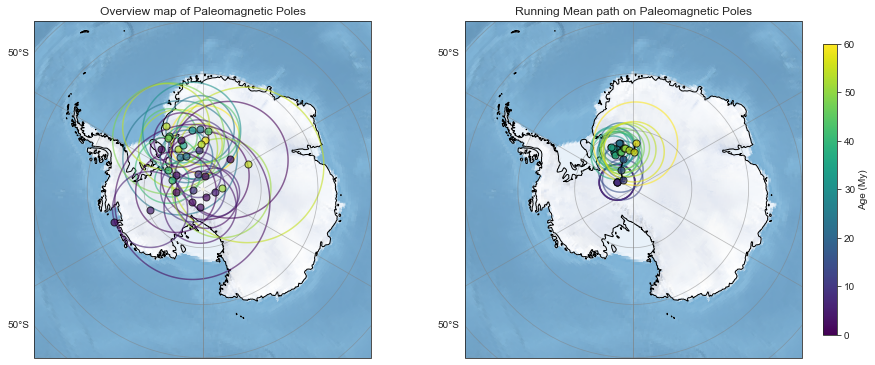

In [6]:
extent = [-180,180,-60,-60]
plot_poles_and_APWP(extent, df_pole_compilation_by_study, RM_classic_by_study)

### Age distribution of paleomagnetic poles

<AxesSubplot:title={'center':'Age distribution of Paleomagnetic Poles'}, xlabel='Mean Age', ylabel='Number of Paleomagentic Poles'>

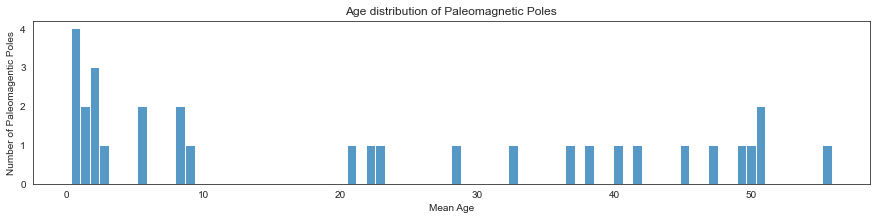

In [14]:
fig = plt.figure(figsize=(15,3))
plt.title('Age distribution of Paleomagnetic Poles')
plt.ylabel('Number of Paleomagentic Poles')
plt.xlabel('Mean Age')
sns.histplot(data = df_pole_compilation_by_study, x = 'mean_age', bins = 80, legend = False) 

### Running Mean Statistics

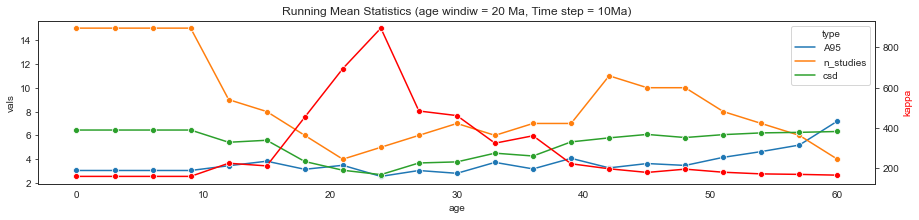

In [8]:
RM_stats(RM_classic_by_study, "Running Mean Statistics (age windiw = 20 Ma, Time step = 10Ma)","Age (Ma)","kappa")

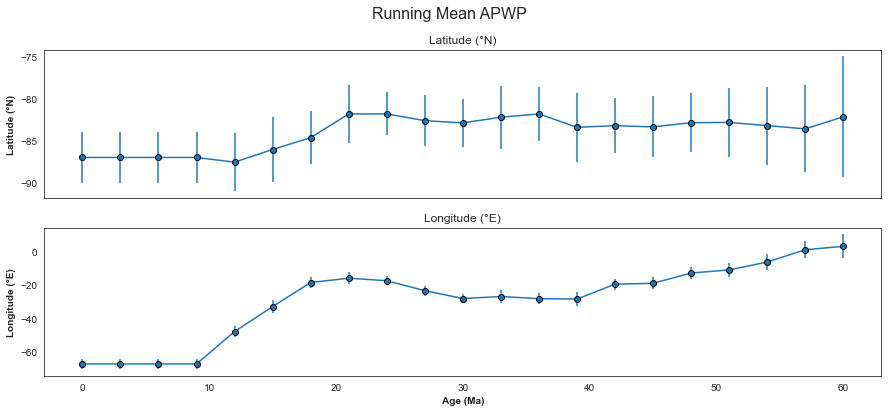

In [10]:
RM_APWP_lat_lon_A95(RM_classic_by_study)